In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Ethereum/ETH-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/5/2019,176.946320,177.713242,173.069565,176.351517,176.351517,5837211771
1,10/6/2019,176.364380,177.364548,171.299774,173.059143,173.059143,5852890674
2,10/7/2019,172.940338,182.356354,171.527817,181.186340,181.186340,7844316834
3,10/8/2019,181.113358,184.359970,179.133392,182.021561,182.021561,7466282780
4,10/9/2019,182.036301,194.300491,180.668442,193.293259,193.293259,9088122101
...,...,...,...,...,...,...,...
1132,11/10/2022,1100.107178,1341.791138,1093.122559,1299.464600,1299.464600,28581002122
1133,11/11/2022,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1134,11/12/2022,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1135,11/13/2022,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

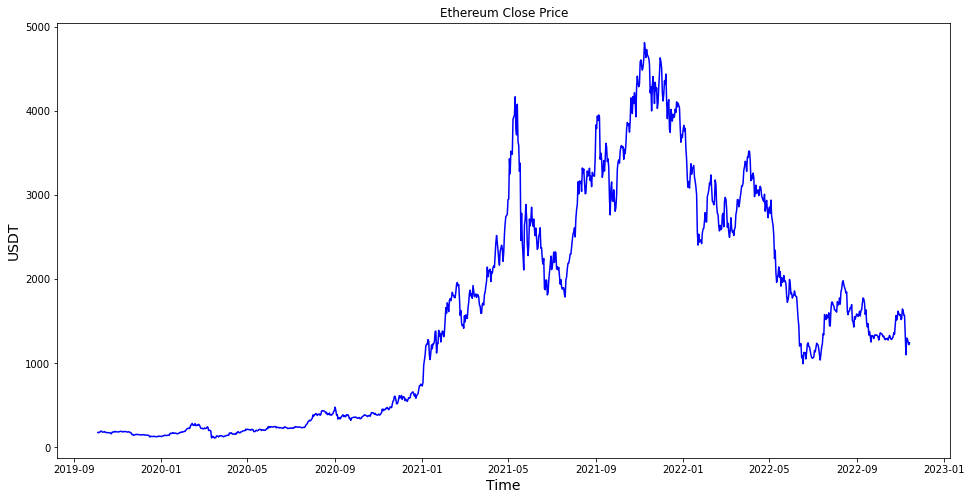

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="blue")
plt.title('Ethereum Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [ ]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-05,176.946320,177.713242,173.069565,176.351517,176.351517,5837211771
1,2019-10-06,176.364380,177.364548,171.299774,173.059143,173.059143,5852890674
2,2019-10-07,172.940338,182.356354,171.527817,181.186340,181.186340,7844316834
3,2019-10-08,181.113358,184.359970,179.133392,182.021561,182.021561,7466282780
4,2019-10-09,182.036301,194.300491,180.668442,193.293259,193.293259,9088122101
...,...,...,...,...,...,...,...
902,2022-03-25,3108.448975,3183.958008,3087.490723,3106.671387,3106.671387,17030503831
903,2022-03-26,3106.405273,3146.825439,3091.825439,3143.178955,3143.178955,8876420740
904,2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834
905,2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770


In [ ]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
908,2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686
909,2022-04-01,3282.576172,3467.555908,3223.891357,3449.552246,3449.552246,20982988937
910,2022-04-02,3449.788574,3521.284668,3442.000244,3445.059326,3445.059326,23571556215
911,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,15333808649
912,2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,3521.241211,18209969743
...,...,...,...,...,...,...,...
1132,2022-11-10,1100.107178,1341.791138,1093.122559,1299.464600,1299.464600,28581002122
1133,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1134,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1135,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214


# **Feature Engineering**

In [ ]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,176.946320,177.713242,173.069565,176.351517,5837211771
1,176.364380,177.364548,171.299774,173.059143,5852890674
2,172.940338,182.356354,171.527817,181.186340,7844316834
3,181.113358,184.359970,179.133392,182.021561,7466282780
4,182.036301,194.300491,180.668442,193.293259,9088122101


In [ ]:
#Normalizing training_data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01415836, 0.01291786, 0.01684787, 0.01398403, 0.00917404],
       [0.01403453, 0.01284485, 0.01646504, 0.01328374, 0.00937157],
       [0.01330596, 0.0138901 , 0.01651437, 0.01501239, 0.03446076],
       ...,
       [0.64544796, 0.6649428 , 0.65648039, 0.67658923, 0.10485608],
       [0.67705168, 0.69267531, 0.68871789, 0.68617278, 0.1954222 ],
       [0.68613716, 0.7023424 , 0.70083035, 0.70007335, 0.18172591]])

In [ ]:
#Prepare train data
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]

907

In [ ]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(847, 60, 5)

# Model Building

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 50, batch_size =32)

Epoch 1/50
27/27 [==============================] - 11s 191ms/step - loss: 0.0604
Epoch 2/50
27/27 [==============================] - 5s 189ms/step - loss: 0.0154
Epoch 3/50
27/27 [==============================] - 5s 188ms/step - loss: 0.0130
Epoch 4/50
27/27 [==============================] - 5s 190ms/step - loss: 0.0098
Epoch 5/50
27/27 [==============================] - 5s 187ms/step - loss: 0.0084
Epoch 6/50
27/27 [==============================] - 5s 187ms/step - loss: 0.0095
Epoch 7/50
27/27 [==============================] - 5s 187ms/step - loss: 0.0095
Epoch 8/50
27/27 [==============================] - 5s 192ms/step - loss: 0.0085
Epoch 9/50
27/27 [==============================] - 5s 187ms/step - loss: 0.0085
Epoch 10/50
27/27 [==============================] - 5s 188ms/step - loss: 0.0080
Epoch 11/50
27/27 [==============================] - 7s 251ms/step - loss: 0.0068
Epoch 12/50
27/27 [==============================] - 5s 188ms/step - loss: 0.0075
Epoch 13/50
27/27 [=====

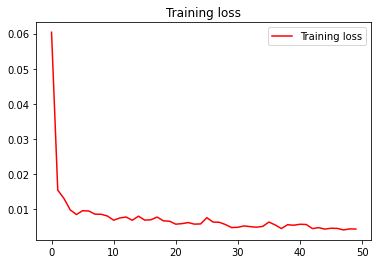

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Performance Evaluation**

In [ ]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2546.590576,2627.609375,2526.989746,2597.084717,11172062661
1,2598.564941,2631.408447,2550.460938,2603.466553,9501221177
2,2603.263428,2697.735352,2489.072266,2688.278809,13778234614
3,2687.898926,2802.315430,2682.621826,2792.117188,13194846235
4,2791.958984,2802.212158,2630.120361,2682.854004,13876301217


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.51837398, 0.52591174, 0.52603977, 0.52887134, 0.07638571],
       [0.52943314, 0.52670725, 0.53111697, 0.53022875, 0.05533544],
       [0.53043289, 0.54059571, 0.51783759, 0.54826823, 0.10921983],
       ...,
       [0.25045013, 0.24543699, 0.24810814, 0.24346845, 0.07377654],
       [0.24364175, 0.2419949 , 0.24083315, 0.23635387, 0.07065829],
       [0.23650384, 0.2446134 , 0.23432377, 0.24056212, 0.12496558]])

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((229, 60, 5), (229,))

In [ ]:
Y_pred = model.predict(X_test)

8/8 [==============================] - 1s 53ms/step


In [ ]:
print("RMSE: ", math.sqrt(mean_squared_error(Y_test,Y_pred)))
print("MSE: ", mean_squared_error(Y_test,Y_pred))
print("MAE: ", mean_absolute_error(Y_test,Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))

RMSE:  0.04403638859156157
MSE:  0.0019392035201870141
MAE:  0.03406730306594454
R2 score: 0.8954949731600093


In [ ]:
scaler.scale_

array([2.12781146e-04, 2.09394134e-04, 2.16316552e-04, 2.12698911e-04,
       1.25986030e-11])

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [ ]:
# Y_test = scaler.inverse_transform(Y_test)
# Y_pred = scaler.inverse_transform(Y_pred) 

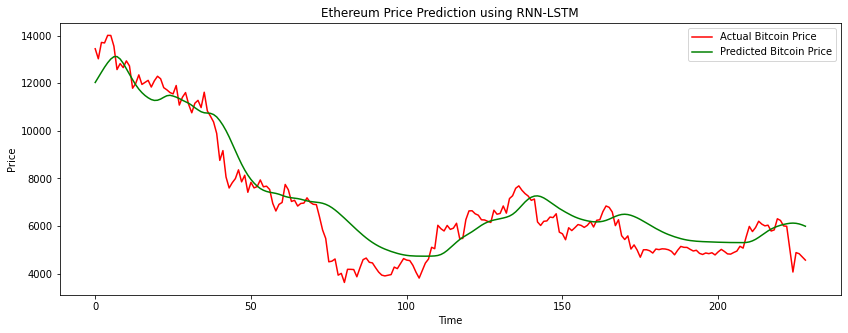

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Ethereum Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()